In [8]:
import numpy as np
from poke.writing import jones_to_fits, read_serial_to_rayfront

# Reading and Writing Jones Pupils to FITS files

In this example, we'll be going through the steps necessary to convert Jones Pupil data and write it to a FITS file.

First, we'll begin with setting up the sample rayfront data we prepared and transforming it into a Jones Pupil.

In [9]:
pth = '../../tests/ELT_rayfront_aspolarized_64rays_0.6um.msgpack'
rf = read_serial_to_rayfront(pth)
rf.compute_jones_pupil(aloc=np.array([0.,1.,0.]))

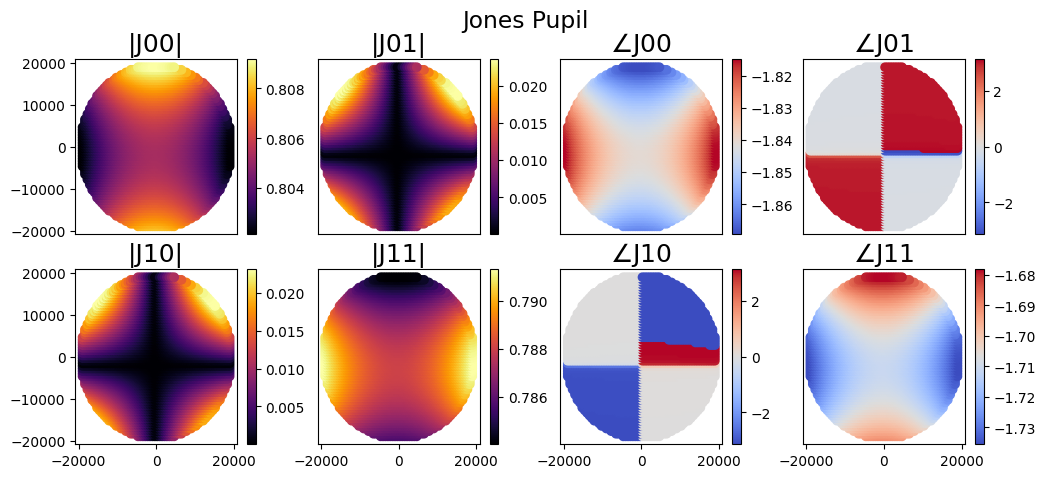

In [10]:
import poke.plotting as plot
plot.jones_pupil(rf)

As you can see above, we have plotted the Jones Pupil data from our sample. Now we will be running the function to convert a Jones Pupil and write it to a FITS file.

The function itself __jones_to_fits__ requires two necessary parameters
    1. _rayfront_ the Rayfront object containing the Jones Pupil
    2. _filename_ the file name you wish to use for the FITS file 

The optional parameters consist of: 
    1. _realImag_ that defaults to true (meaning imaginary values will be saved as opposed to saving the absolute values)
    2. _which_ that defaults to -1, denoting what the index for where poke.Rayfront.jones_pupil list will be saved
    3. _nmodes_ that defaults to 11 for the number of Noll-ordered Zernike polynomials to use in the decomposition
    4. _npix_ that defaults to 128 for the number of samples along one dimension of the square jones pupil

Note: Currently the function is set to overwrite a file if one of the same name already exists so be careful as you input file names!

In [11]:
# try writing it
jones_to_fits(rf,'sample_jones')

You did it! Now to go into detail just how the data is stored in the file and some practice accessing it.

The format for the data saves is:

Primary Header (hdul[0]): 
    Contains an N x N x 2 x 2 x 2 numpy array consisting of
1. N x N values for the exit pupil coordinate
2. Matrix row values
3. Column row values
4. Real/Imaginary parts

BinTable (hdul[1]):
    Contains a 7 column array for the given values in this order
1. wavelength
2. field_of_view_x
3. field_of_view_y
4. residuals_jxx
5. residuals_jxy
6. residuals_jyx
7. residuals_jyy

For the values in the BinTable, we will demonstrate how you can access the data both from using the index or the value names above.

Below, we will first import astropy.io (while not required for this package is used for the sake of this demo).
We will then open the file using __'with fits.open('sample_jones.fits') as hdul:'__ which is done to safely open and automatically close the file after the respective commands are run. Then, we will demonstrate some of the ways we can easily access this data.

Note: if you change the name of the sample file above, make sure to change it below as well!

In [12]:
from astropy.io import fits

with fits.open('sample_jones.fits') as hdul:
    print('Here we see the main data for the FITS file')
    hdul.info()
    print()

    print('For the primary header, we can access it at index 0 either looking at the header or data')
    print(hdul[0].header)
    print(hdul[0].data)
    print()

    print('For accessing the other values within the BinTable, you can use data to retrieve all values,')
    print('the index location, or using the names we have listed above for each given value')
    print(hdul[1].data)
    print(hdul[1].data['residuals_jxy'])
    print(hdul[1].data['field_of_view_x'])


Here we see the main data for the FITS file
Filename: sample_jones.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (2, 2, 2, 128, 128)   float64   
  1                1 BinTableHDU     22   1R x 7C   [E, D, D, D, D, D, D]   

For the primary header, we can access it at index 0 either looking at the header or data
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    5 / number of array dimensions                     NAXIS1  =                    2                                                  NAXIS2  =                    2                                                  NAXIS3  =                    2                                                  NAXIS4  =                  128                                                  NAXIS5  =                  128                                  

And that's it! Feel free to play around accessing values above and for documentaion for the __jones_to_fits__ function, you can find it in poke/writing.py.

\- Kenji Mulhall